# Grid World

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.table import Table

In [2]:
ACTIONS=[np.array([0,1]),np.array([0,-1]),np.array([-1,0]),np.array([1,0])]  #up,down,left, right as per coordinate axis (+y,-y,+x,-x)

WORLD=4 #4x4

ACTION_PROB=0.25 #all are equally likely

REWARD=-1  #given

In [3]:
def terminate(state):
    x,y=state #state is a numpy list array

    return (x == 0 and y == 0) or (x == WORLD- 1 and y == WORLD- 1)  #if it's in the first block or in the last one


In [4]:
def step(state, action):
    if terminate(state):
        return state, 0

    next_state=(np.array(state)+action).tolist()
    x,y=next_state

    if x < 0 or x >= WORLD or y < 0 or y >= WORLD:
        next_state = state  #basically if it's getting out of the grid

    reward=REWARD
    return next_state, reward

In [5]:
#values will be those inside the boxes
def state_value(in_place,discount=1):  #undiscounted as given, in_place concept was given in the sutton-barto book, hence included.
    new_state_val=np.zeros((WORLD,WORLD))  #constructing the world
    iteration=0  #initiated to 0
    while True:
        if in_place:
            state_val=new_state_val
        else:
            state_val=new_state_val.copy()
        old_state_val=state_val.copy()

        for i in range(WORLD):
            for j in range(WORLD):
                value=0
                for action in ACTIONS:
                    (next_i, next_j), reward=step([i,j], action)
                    value+=ACTION_PROB*(reward+discount*state_val[next_i, next_j])  #computing the state value!
                new_state_val[i,j]=value

        max_delta_val=abs(old_state_val-new_state_val).max()  #computing the error/difference
        if max_delta_val<1e-4:
            break
        iteration+=1
    return new_state_val, iteration

In-place: 113 iterations


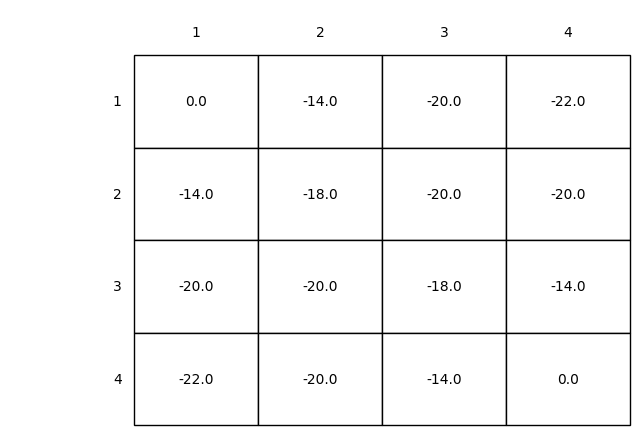

In [6]:
values,iter_1=state_value(in_place=True)
# values, iter_2=state_value(in_place=False)

#Making the grid:
fig,axes=plt.subplots()
axes.set_axis_off()
table=Table(axes, bbox=[0,0,1,1])

#shape
col,row=values.shape
width,height=1.0/col, 1.0/row

#cells:
for (i,j),val in np.ndenumerate(np.round(values, 2)):# had to use the same logic given in github since iterating over 3 loops was taking time, and also was giving errors frequently
    table.add_cell(i,j,width, height, text=val, loc='center', facecolor='white')
#rows and columns labels:
for i in range(len(values)):  
    table.add_cell(i,-1, width, height, text=i+1, loc='right',edgecolor='none',facecolor='none')
    table.add_cell(-1,i, width, height/2, text=i+1, loc='center', edgecolor='none',facecolor='none')
axes.add_table(table)

print('In-place: {} iterations'.format(iter_1))
# print('Synchronous: {} iterations'.format(iter_2))

plt.show()